In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm, kurtosis, chi2
from statsmodels.stats.stattools import durbin_watson, jarque_bera

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import replace
# vamos a leer las tablas:

datos_madres=pd.read_excel('/content/datos_madres.xlsx')
print((datos_madres.info()))
# aca vemos que la altura de la mujer no está en formato numérico. Vamos a convertirla a número.
datos_madres['ALTURA_M_MUJER'] = datos_madres.ALTURA_M_MUJER.str.replace(',', '.').astype(float)
#veamos como quedó:
print((datos_madres.info()))
#oka
print(datos_madres.head())

#-------------------------------#




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   345 non-null    int64  
 1   ALTURA_M_MUJER       345 non-null    object 
 2   PESO_KG_MUJER        345 non-null    float64
 3   NUM_CIGARRILLOS_DIA  345 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 10.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   345 non-null    int64  
 1   ALTURA_M_MUJER       345 non-null    float64
 2   PESO_KG_MUJER        345 non-null    float64
 3   NUM_CIGARRILLOS_DIA  345 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 10.9 KB
None
   ID  ALTURA_M_MUJER  PESO_KG_MUJER  NUM_CIGARRILLOS_DIA
0   1     

In [ ]:
#nacimientos=pd.read_csv('/content/nacimientos.csv', sep=';')

#print(nacimientos.info())
#print(nacimientos.head()) # acá vemos que el csv arranca con un texto descriptivo (que no nos resulta útil en este caso) y los datos del dataframe comienzan recién en la 3ra fila (2 arrancando de cero).

nacimientos=pd.read_csv('/content/nacimientos.csv', sep=';',  skiprows=3) #salteamos las 3 primeras filas que no contienen datos útiles.

print(nacimientos.info())
print(nacimientos.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_madre       345 non-null    int64  
 1   peso_kg_bebe   345 non-null    float64
 2   semanas_gest   345 non-null    float64
 3   edad_anios     345 non-null    int64  
 4   hijos_previos  345 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 13.6 KB
None
   id_madre  peso_kg_bebe  semanas_gest  edad_anios  hijos_previos
0         1        3057.4          38.8          21              1
1         2        2716.6          38.1          26              0
2         3        3230.8          39.1          18              1
3         4        3473.3          41.8          28              2
4         5        2951.5          38.0          29              3


In [ ]:
#por las dudas veamos los describe a ver si no aparecen atípicos...

print(datos_madres[['ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA']].describe())

# no se observan valores atípicos en este dataset.

print(nacimientos[['peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos']].describe())
# en el dataset de nacimientos, parece haber un outlier en relación a la edad en años (una madre de 9 años) pero podría ser un caso excepcional y no recomiendo imputarlo.


       ALTURA_M_MUJER  PESO_KG_MUJER  NUM_CIGARRILLOS_DIA
count      345.000000     345.000000           345.000000
mean         1.634783      59.215362             3.089855
std          0.080381      10.213809             3.570802
min          1.400000      40.800000             0.000000
25%          1.600000      52.200000             0.000000
50%          1.600000      58.100000             1.000000
75%          1.700000      64.400000             6.000000
max          1.800000     113.400000            10.000000
       peso_kg_bebe  semanas_gest  edad_anios  hijos_previos
count    345.000000    345.000000  345.000000     345.000000
mean    3061.461739     38.891884   27.417391       2.182609
std      333.460459      2.252181    5.727305       1.758282
min     2151.600000     33.100000    9.000000       0.000000
25%     2848.300000     37.500000   23.000000       1.000000
50%     3059.200000     39.000000   27.000000       2.000000
75%     3267.800000     40.300000   31.000000      

   ID  ALTURA_M_MUJER  PESO_KG_MUJER  NUM_CIGARRILLOS_DIA  FUMA        IMC
0   1             1.6           45.4                    0     0  17.734375
1   2             1.6           61.2                    9     1  23.906250
2   3             1.6           52.2                    2     1  20.390625
3   4             1.8           86.2                    0     0  26.604938
4   5             1.7           56.7                    4     1  19.619377


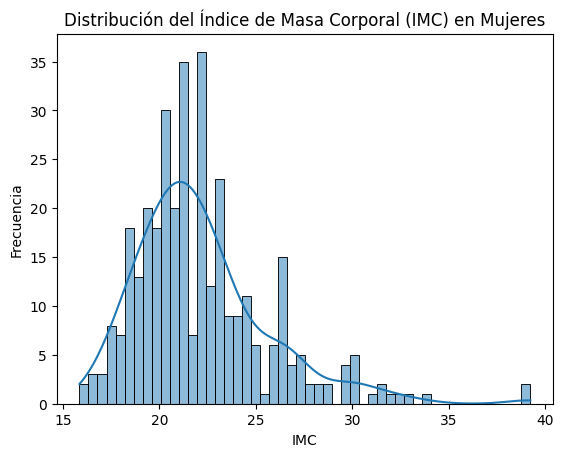

In [ ]:
'''Ejercicio 2. Considerando que el Índice de Masa Corporal (IMC) se define como el peso de una
persona en kilogramos dividido por el cuadrado de la estatura en metros, represente
gráficamente la distribución de dicha variable para las mujeres del dataset. En base al gráfico
realizado, ¿cómo caracterizaría su distribución en relación a la simetría?
'''

datos_madres['IMC'] = datos_madres['PESO_KG_MUJER']/datos_madres['ALTURA_M_MUJER']**2 # hacemos el cálculo del IMC de la madre.
print(datos_madres.head())

sns.histplot(datos_madres['IMC'], bins=50, kde=True)
plt.title('Distribución del Índice de Masa Corporal (IMC) en Mujeres')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

# vemos una asimetría a la derecha en la distribución del IMC de Mujeres.

In [ ]:
'''
Ejercicio 3. Genere una variable categórica binaria realizando la dicotomización de la variable
vinculada con el número de cigarrillos consumidos a diario, diferenciando aquellas mujeres que no
fuman habitualmente (no consumen cigarrillos) de aquellas que sí lo hacen (consumen 1 o más
cigarrillos diariamente). ¿Qué porcentaje de las mujeres del dataset son fumadoras?
'''

datos_madres['FUMA'] = np.where(datos_madres['NUM_CIGARRILLOS_DIA'] > 0, 1, 0)
datos_madres['FUMA'].value_counts(normalize=True)

#la proporción de fumadoras es de 0.5594, el porcentaje de fumadoras es de 55,94%.




,proportion
FUMA,
1,0.55942
0,0.44058


In [ ]:
print(nacimientos.columns)
print(datos_madres.columns)


Index(['id_madre', 'peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos'],
      dtype='object')
Index(['ID', 'ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA', 'IMC',
       'FUMA'],
      dtype='object')


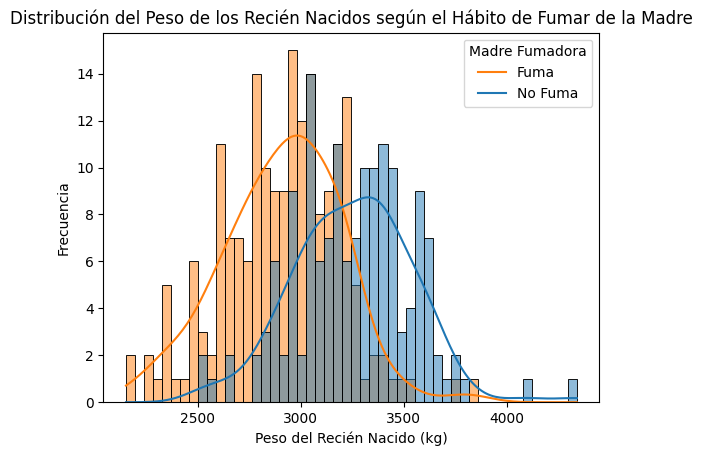

In [ ]:
'''
Ejercicio 4. Represente gráficamente la distribución del peso de los recién nacidos en función del
carácter o no de fumadora de la madre (variable generada en el ítem anterior). Comente brevemente
lo observado.
'''

# Acá tenemos que juntar las tablas para que los datos de las madres esten relacionados con los datos de los bebés recién nacidos.
datos_totales = pd.merge(datos_madres, nacimientos, left_on='ID', right_on='id_madre', how='inner')

# Gráficamos las distribuciones de los pesos de los bebés en función del hábito de fumar de la madre.
sns.histplot(data=datos_totales, x='peso_kg_bebe', bins=50, kde=True, hue='FUMA')
plt.title('Distribución del Peso de los Recién Nacidos según el Hábito de Fumar de la Madre')
plt.xlabel('Peso del Recién Nacido (kg)')
plt.ylabel('Frecuencia')
plt.legend(title='Madre Fumadora', labels=['Fuma', 'No Fuma'])
plt.show()

#ambas distribuciones son de forma campanular, presentando leves asimetrías. Se observa que la distribución del peso de los recién nacidos de las madres fumadoras está desplazada a la izquierda
# de la distribución del peso de los hijos de las no fumadoras, lo que muestra una diferencia general en la distribución del peso de los recién nacidos bajo esta condición (a nivel de análisis descriptivo).


In [ ]:
datos_totales.columns

Index(['ID', 'ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA', 'FUMA',
       'id_madre', 'peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos'],
      dtype='object')

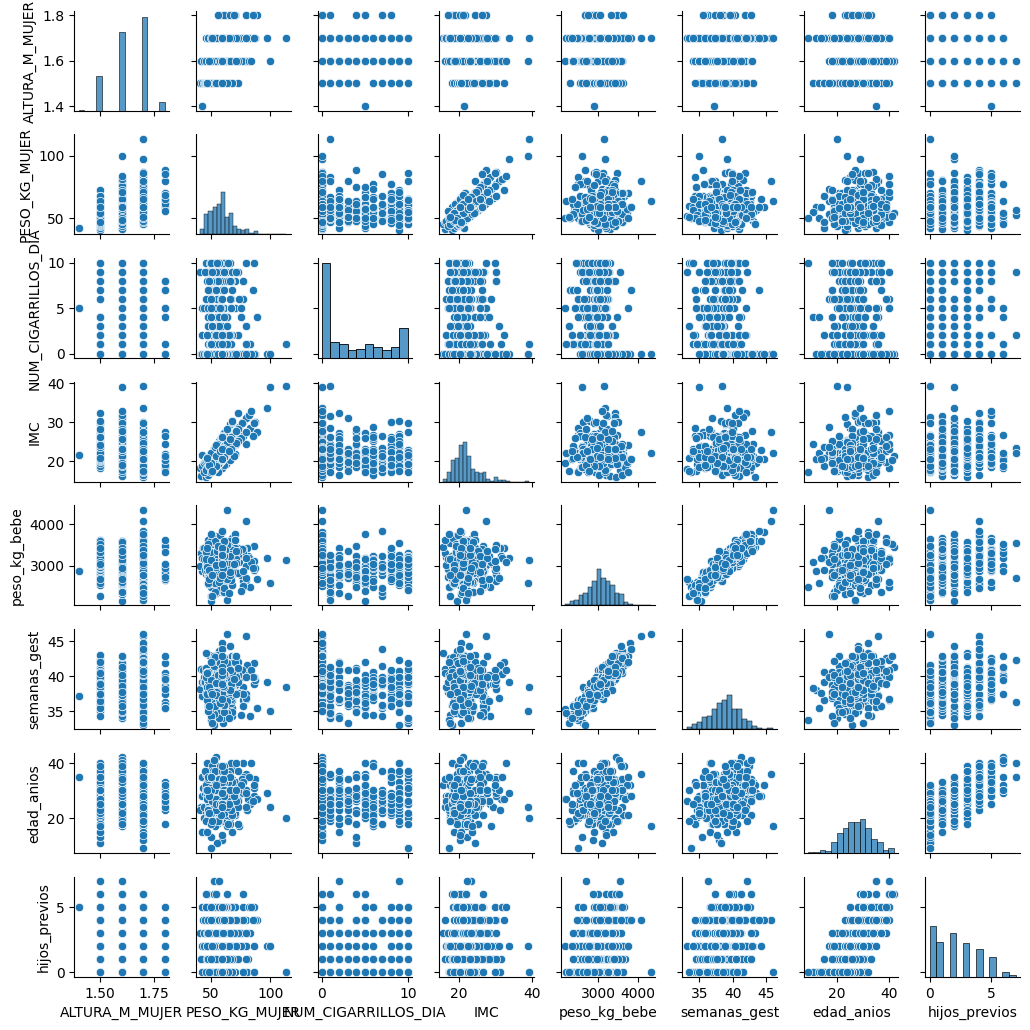

In [ ]:
'''
Ejercicio 5. Realice un gráfico que le permita caracterizar el grado de asociación lineal que existe
entre las diferentes variables cuantitativas estudiadas. ¿Cuáles son los pares de variables que presentan
una asociación lineal más intensa? Justifique.
'''

#datos_totales.columns # de acá seleccionamos las variables cuantitativas

sns.pairplot(datos_totales[['ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA', 'IMC','peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos']], height=1.3)
plt.tight_layout()
plt.show()

#las variables que en la representación muestran relación lineal más intensa son peso en kgs del bebé y semanas de gestacion. IMC es una construcción en relación a la estatura y peso, muestra comportamiento lineal pero es una variable creada.


In [ ]:
#Veamos las correlaciones de pearson:

datos_totales[['ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA', 'IMC','peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos']].corr()

#acá comprobamos la relación lineal que veíamos en los pairplots.

,ALTURA_M_MUJER,PESO_KG_MUJER,NUM_CIGARRILLOS_DIA,IMC,peso_kg_bebe,semanas_gest,edad_anios,hijos_previos
ALTURA_M_MUJER,1.000000,0.422863,-0.027125,-0.160836,0.053610,0.040906,-0.019630,-0.034787
PESO_KG_MUJER,0.422863,1.000000,-0.087921,0.822652,0.001569,0.033818,0.112308,0.074303
NUM_CIGARRILLOS_DIA,-0.027125,-0.087921,1.000000,-0.078575,-0.330794,-0.294905,-0.063671,-0.021141
IMC,-0.160836,0.822652,-0.078575,1.000000,-0.033207,0.011983,0.135988,0.096132
peso_kg_bebe,0.053610,0.001569,-0.330794,-0.033207,1.000000,0.903490,0.157501,0.210663
semanas_gest,0.040906,0.033818,-0.294905,0.011983,0.903490,1.000000,0.236312,0.226549
edad_anios,-0.019630,0.112308,-0.063671,0.135988,0.157501,0.236312,1.000000,0.695034
hijos_previos,-0.034787,0.074303,-0.021141,0.096132,0.210663,0.226549,0.695034,1.000000


In [ ]:
print(datos_totales.columns)

Index(['ID', 'ALTURA_M_MUJER', 'PESO_KG_MUJER', 'NUM_CIGARRILLOS_DIA', 'IMC',
       'FUMA', 'id_madre', 'peso_kg_bebe', 'semanas_gest', 'edad_anios',
       'hijos_previos'],
      dtype='object')


In [ ]:
'''
El objetivo principal de esta segunda parte es analizar si es factible ajustar un modelo de regresión
lineal múltiple que permita predecir el peso de los recién nacidos en función de las semanas de
gestación, el número de partos previos atravesados por la madre, la edad de la madre, su índice
de masa corporal (IMC) y el carácter o no de fumadora.
a. Ajuste el modelo completo, incluyendo la totalidad de las variables predictoras de interés.
¿Cuál/es de las variables incluidas contribuye/n significativamente a explicar las diferencias
en el peso promedio de los recién nacidos con un nivel de significación del 1%? Justifique.

b. Si a partir de su respuesta en el ítem anterior considera la posibilidad de ajustar un nuevo
modelo que incluya menos variables predictoras que el modelo completo, realice el ajuste. De lo
contrario, pase al ítem siguiente.
c. Escriba la ecuación del modelo ajustado en forma desarrollada e interprete el valor del coeficiente
estimado por el modelo para la variable semanas de gestación.
d. Una médica quiere estimar el peso al nacer que tendrá un bebé que dará a luz una madre
primeriza no fumadora de 25 años, que posee un índice de masa corporal de 19.5 kg/m2
, luego
de un total de 38 semanas de gestación. Utilice el último modelo ajustado para informarle un
peso estimado.
e. Represente gráficamente la distribución de los residuos del modelo y comente brevemente las
características que observa.
'''

mod_bebes=smf.ols(formula='peso_kg_bebe ~ semanas_gest + hijos_previos + edad_anios + IMC + FUMA', data=datos_totales)
res_bebes=mod_bebes.fit()
print(res_bebes.summary())

#IMC es la única variable que no contribuye significativamente a explicar las diferencias del peso promedio del bebé con un nivel de significación del 1%. El valor p en este caso es de 0.042.
#Las demás variables incluidas son significativas al 1%.

#teniendo en cuenta un nivel de significación del 1% el nuevo modelo debería omitir a la variable IMC, siendo:

mod_bebes_2=smf.ols(formula='peso_kg_bebe ~ semanas_gest + hijos_previos + edad_anios + FUMA', data=datos_totales)
res_bebes_2=mod_bebes_2.fit()
print(res_bebes_2.summary())



                            OLS Regression Results                            
Dep. Variable:           peso_kg_bebe   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     356.2
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          1.50e-132
Time:                        19:01:27   Log-Likelihood:                -2177.1
No. Observations:                 345   AIC:                             4366.
Df Residuals:                     339   BIC:                             4389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1531.1921    156.252     -9.799

 El modelo ajustado sería

 peso_bebe_al_nacer= -1630.96 +125.88 x semanas_gest + 17.20 x hijos_previos - 6.93 edad_anios -91.06 FUMA + error

 El valor del coeficiente asociado a semanas de gestación indica que al aumentar en una semana de gestación el embarazo el peso del bebé aumenta en 125.88 gramos, manteniendo las demás variables constantes en el modelo.


In [ ]:
'''d. Una médica quiere estimar el peso al nacer que tendrá un bebé que dará a luz una madre
primeriza no fumadora de 25 años, que posee un índice de masa corporal de 19.5 kg/m2
, luego
de un total de 38 semanas de gestación. Utilice el último modelo ajustado para informarle un
peso estimado.'''

#en base a esto usamos el modelo 1, porque incluimos el indice de masa corporal.

caso_estudio = pd.DataFrame({
    "semanas_gest": [38],
    "hijos_previos": [0],
    "edad_anios": [25],
    "IMC": [19.5],
    "FUMA": [0]
})

prediccion = res_bebes.predict(caso_estudio)
print(f'El peso estimado por el modelo para este caso es: {round(prediccion.iloc[0],2)} g')

El peso estimado por el modelo para este caso es: 2991.17 g


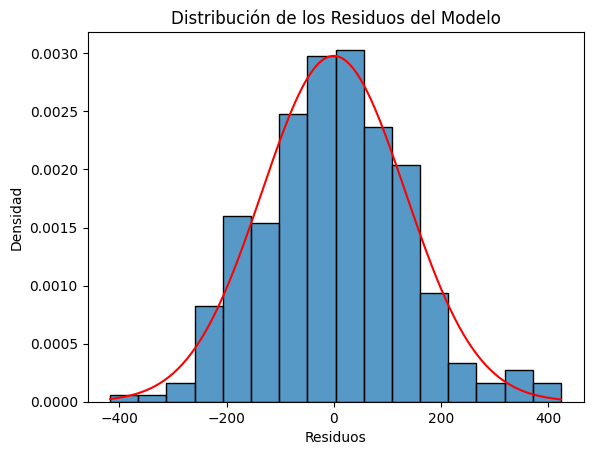

In [ ]:
''' vamos a ver los residuos del modelo'''

residuos=res_bebes_2.resid
media_res=np.mean(residuos)
std_res=np.std(residuos)

x=np.linspace(min(residuos),max(residuos),200)
normal_teorica=norm.pdf(x,media_res,std_res)


sns.histplot(residuos, kde=False,stat='density')
plt.plot(x,normal_teorica,color='red')
plt.title('Distribución de los Residuos del Modelo')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.show()

Los residuos son normales.

Curtosis de los residuos: 0.19467001226810554


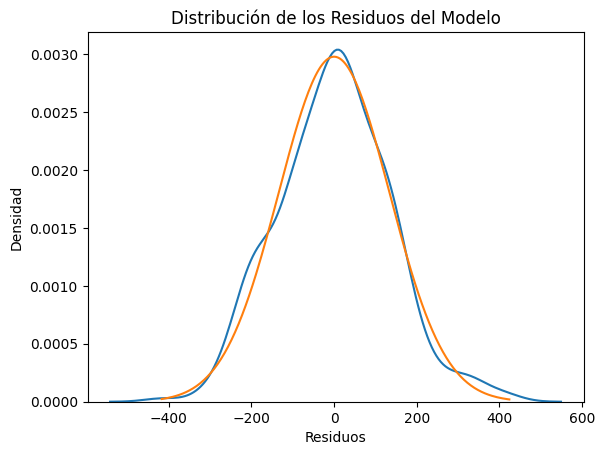

In [ ]:
curt_res=kurtosis(residuos)
print(f'Curtosis de los residuos: {curt_res}')

sns.kdeplot(residuos, label=f"Curtosis: {round(curt_res,2)}")
plt.title('Distribución de los Residuos del Modelo')
plt.plot(x,normal_teorica)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.show()

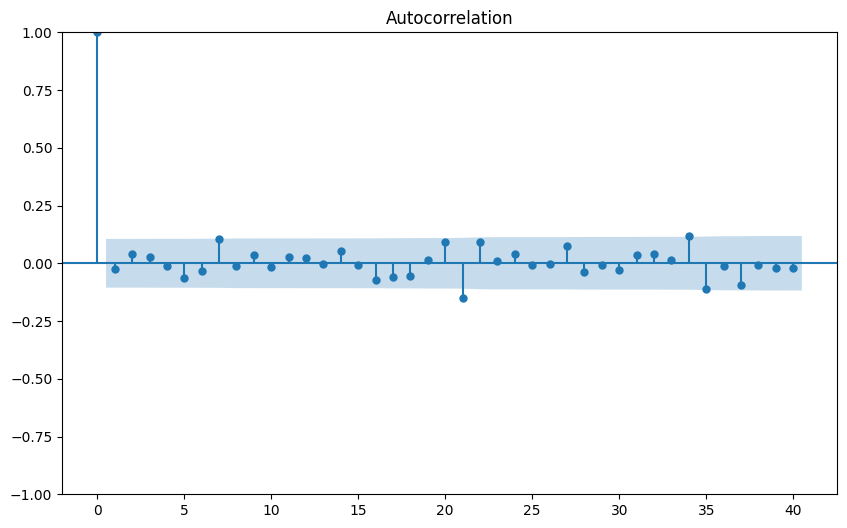

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuos, lags=40, ax=ax)
plt.show()

No se observan autocorrelaciones marcadas en los residuos.


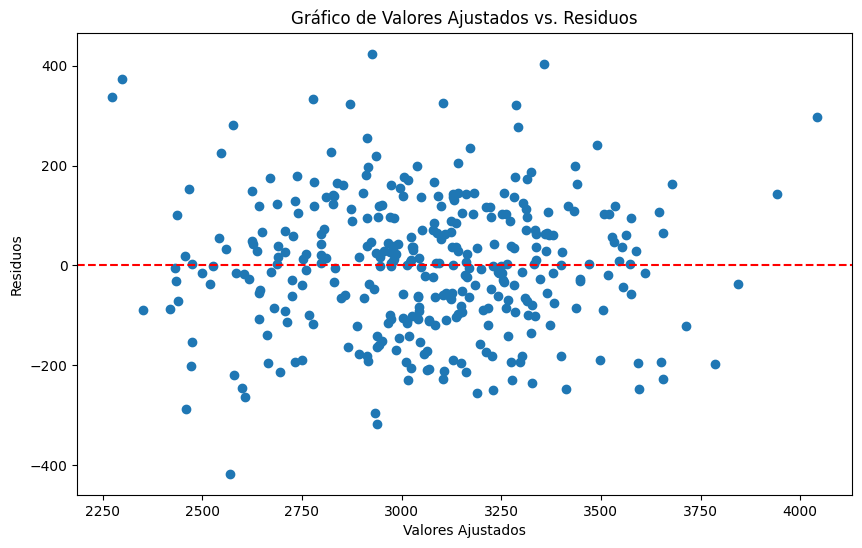

In [ ]:
fitted=res_bebes_2.fittedvalues
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(fitted, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Valores Ajustados vs. Residuos')
plt.show()

No se observan patrones marcados en los residuos del modelo contra los valores ajustados.